# Спектр гармонического сигнала

## Цель работы

Необходимо получить графики гармонического сигнала с частотами 1,2,4,8 герц и спектры этих сигналов.

## Код программы

In [6]:
%matplotlib notebook
from cycler import cycler
from numpy import sin, cos, linspace
from scipy.fft import *
from math import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [30]:
X_RANGE   = 64
ACCURACY   = 1024

def restore_func(_func_):
    x      = linspace(0., X_RANGE, ACCURACY)
    y      = [_func_(xi) for i, xi in enumerate(x)]
    return (x, y)

def restore_decay(x, A, k, a=0):
    y = [dump(xi, A, k) + a for xi in x]
    return (y, [-yi for yi in y])

def restore_spectrum(x, y, A):
    n = len(y)
    
    '''
    ampl = abs(A * fft(y)/n)
    ampl = ampl[range(n//2)]
    
    freq = arange(n//2) /10
    '''
    
    ampl = abs(rfft(y))
    #ampl = ampl[range(n//2)]
    
    freq = rfftfreq(n, 1/1024)
    
    """
    ampl_ = []
    for a in ampl:
        if a - 0 > 0.01: ampl_.append(a)
    ampl = ampl_
    n = len(ampl)
    """
    
    return (ampl, freq)

def display(fig, x, y, color='gray'):
    weight = 1
    if color == 'gray':
        style = 'dashed'
    else:
        style = 'solid'
        
    fig.plot(x, y, color, lw=weight, ls=style)
    fig.grid()

def dump(t, A, k=0):
    return A * exp(-k * t)

<IPython.core.display.Javascript object>


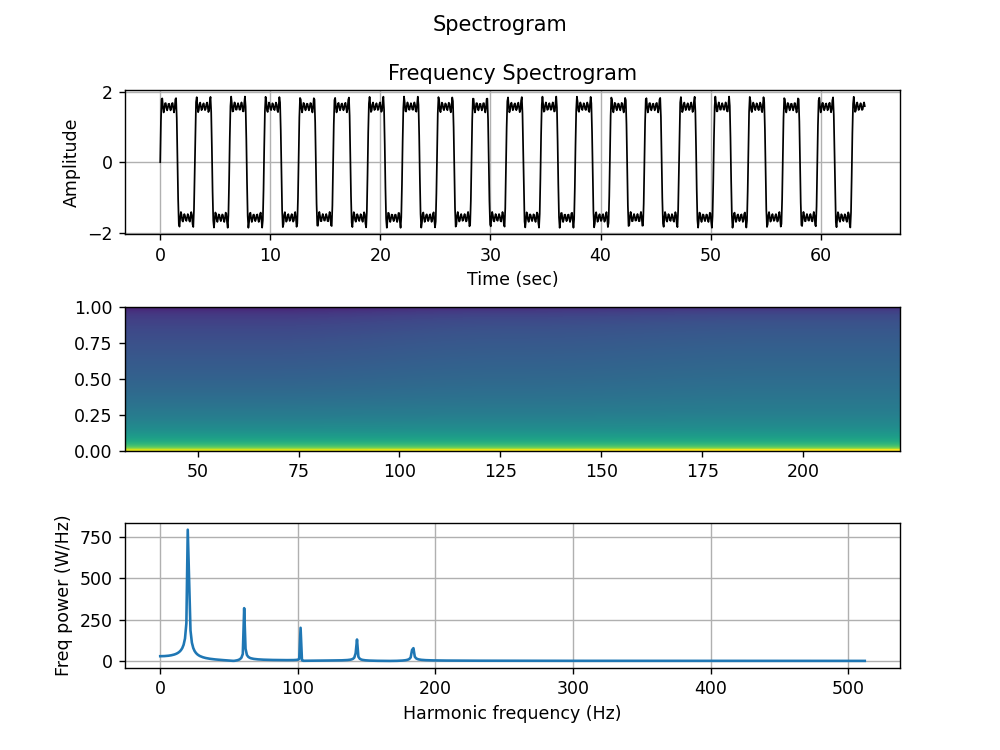

Text(0.5, 0, 'Harmonic frequency (Hz)')

In [41]:
A = 2.0
k = 0.0
def func(t):
    freq = 2
    w    = freq #* 2 * pi
    q    = 0

    return dump(t, A, k) * (sin(1*w*t) / 1 + sin(3*w*t) / 3 + sin(5*w*t) / 5 + sin(7*w*t) / 7 + sin(9*w*t) / 9)
    # dump(t, A, k) * (sin(1*w*t) / 1 + sin(2*w*t) / 2 + sin(4*w*t) / 4 + sin(8*w*t) / 8)
    # dump(t, A, k) * (sin(1*w*t) / 1 + sin(3*w*t) / 3 + sin(5*w*t) / 5 + sin(7*w*t) / 7 + sin(9*w*t) / 9)
    # dump(t, A, k) * sin(w * t + q)

x, y          = restore_func(func)
decay, decay_ = restore_decay(x, A, k)
    
freq, ampl = restore_spectrum(x, y, A)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(8, 6), dpi=100, nrows=3)
fig.subplots_adjust(wspace=1.2, hspace=0.5)
fig.suptitle('Spectrogram')

ax1.grid()
ax3.grid()

ax1.set_title('Raw Signal')
ax1.set_title('dB Spectrogram')
ax1.set_title('Frequency Spectrogram')

ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (sec)')
ax3.set_ylabel('Freq power (W/Hz)')
ax3.set_xlabel('Harmonic frequency (Hz)')

# Plotting
ax1.plot(x, y, lw=1, color='black')
ax2.specgram(ampl)
ax3.plot(ampl, freq)


# display(x, y, 'blue')

# display(freq, ampl, 'red')
# display(ax1, x, decay)
# display(ax1, x, decay_)

#ось ординат: Вт / Гц

In [18]:
"""
##
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
#plt.show()
"""

'\n##\n# Fixing random state for reproducibility\nnp.random.seed(19680801)\n\ndt = 0.0005\nt = np.arange(0.0, 20.0, dt)\ns1 = np.sin(2 * np.pi * 100 * t)\ns2 = 2 * np.sin(2 * np.pi * 400 * t)\n\n# create a transient "chirp"\ns2[t <= 10] = s2[12 <= t] = 0\n\n# add some noise into the mix\nnse = 0.01 * np.random.random(size=len(t))\n\nx = s1 + s2 + nse  # the signal\nNFFT = 1024  # the length of the windowing segments\nFs = int(1.0 / dt)  # the sampling frequency\n\nfig, (ax1, ax2) = plt.subplots(nrows=2)\nax1.plot(t, x)\nPxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)\n# The `specgram` method returns 4 objects. They are:\n# - Pxx: the periodogram\n# - freqs: the frequency vector\n# - bins: the centers of the time bins\n# - im: the .image.AxesImage instance representing the data in the plot\n#plt.show()\n'

In [55]:
def parse_asc(file):
    res = {'deriv_names': [], 'freq': -1, 'deriv_array': []}

    i = 0
    while True:
        line = file.readline()
        if not line:
            break
        if i == 1:
            freq = int(line.split(': ')[1])
            res['freq'] = freq
        if i == 3:
            deriv_names = line.split(': ')[1].split(', ')
            deriv_names[-1] = deriv_names[-1][:-2]
            res['deriv_names'] = deriv_names
            for k in range(len(deriv_names)):
                res['deriv_array'].append([])
        if i > 3:
            line = line.split(' ')
            deriv_count = len(res['deriv_names'])
            for k in range(deriv_count):
                if line[k].__contains__('\n'):
                    line[k] = line[k].split('\n')[0]
                res['deriv_array'][k].append(int(line[k]))
        i += 1
    file.close()
    return res

def theta_rhytm_filter(array, freq):
    y = np.array(array)
    n = len(array)
    yf = rfft(y) # Прямое преобразование Фурье
    xf = rfftfreq(n, 1/freq) # Преобразование Фурье для x
    points_per_freq = len(xf) / (freq / 2)
    
    # Обрезание спектра сверху и снизу
    high = int(7 * points_per_freq)
    low = int(4 * points_per_freq)
    yf[:low] = 0
    yf[high:] = 0
    new_sig = irfft(yf)
    res = np.append(new_sig, 0)
    return res

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y


if __name__ == '__main__':
    default_path = '/EEG Data'
    file_name = askopenfilename(initialdir = os.getcwd() + '/dannye_eeg')
    asc_file = open(file_name, 'r')
    eeg = parse_asc(asc_file)

    # Для отображения секунд  а не тиков
    seconds = [x / eeg['freq'] for x in range(len(eeg['deriv_array'][0]))]
    len('s' + str(len(seconds)))

    plt.style.use('seaborn-whitegrid')

    # Первое отведение
    aa = plt.subplot(3, 2, 1)
    aa.plot(seconds, eeg['deriv_array'][0], label=eeg['deriv_names'][0])
    aa.plot(seconds, theta_rhytm_filter(eeg['deriv_array'][0], eeg['freq']), label='Тета ритм ' + eeg['deriv_names'][0])
    delta_f = scipy.signal.unit_impulse(9, 4)
    #aa.plot(delta_f)
    #aa.plot(theta_rhytm_filter(delta_f, 4))
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, мВ')
    plt.legend()

    # Второе отведение
    ab = plt.subplot(3, 2, 2)
    print('vt' + str(len(eeg['deriv_array'][1])))
    ab.plot(seconds, eeg['deriv_array'][1], label=eeg['deriv_names'][1])
    ab.plot(seconds, theta_rhytm_filter(eeg['deriv_array'][1], eeg['freq']), label='Тета ритм ' + eeg['deriv_names'][1])
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, мВ')
    plt.legend()

    # Третье отведение
    ba = plt.subplot(3, 2, 3)
    ba.plot(seconds, eeg['deriv_array'][2], label=eeg['deriv_names'][2])
    ba.plot(seconds, theta_rhytm_filter(eeg['deriv_array'][2], eeg['freq']), label='Тета ритм ' + eeg['deriv_names'][2])
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, мВ')
    plt.legend()

    # Четвёртое отведение
    bb = plt.subplot(3, 2, 4)
    bb.plot(seconds, eeg['deriv_array'][3], label=eeg['deriv_names'][3])
    bb.plot(seconds, theta_rhytm_filter(eeg['deriv_array'][3], eeg['freq']), label='Тета ритм ' + eeg['deriv_names'][3])
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, мВ')
    plt.legend()

    # Пятое отведение
    ca = plt.subplot(3, 2, 5)
    ca.plot(seconds, eeg['deriv_array'][4], label=eeg['deriv_names'][4])
    ca.plot(seconds, theta_rhytm_filter(eeg['deriv_array'][4], eeg['freq']), label='Тета ритм ' + eeg['deriv_names'][4])
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, мВ')
    plt.legend()

    # Шестое отведение
    cb = plt.subplot(3, 2, 6)
    cb.plot(seconds, eeg['deriv_array'][5], label=eeg['deriv_names'][5])
    cb.plot(seconds, theta_rhytm_filter(eeg['deriv_array'][5], eeg['freq']), label='Тета ритм ' + eeg['deriv_names'][5])
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, мВ')
    plt.legend()

    plt.show()

NameError: name 'askopenfilename' is not defined